<a href="https://colab.research.google.com/github/konkal-shirisha/aiml_shirisha/blob/main/Decision_trees_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: I WANT TO CONNECT GOOGLE COLLAB TO DRIVE AND UPLOAD A CSV FILE

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
# Replace '/content/drive/MyDrive/path/to/your/file.csv' with the full path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/your_file.csv'

try:
    df = pd.read_csv(file_path)
    print("File uploaded successfully!")
    print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Mounted at /content/drive
Error: File not found at /content/drive/MyDrive/your_file.csv. Please check the file path.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


In [7]:
data = pd.read_csv("iris.csv")
print(data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [8]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
data.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


<Axes: xlabel='variety', ylabel='count'>

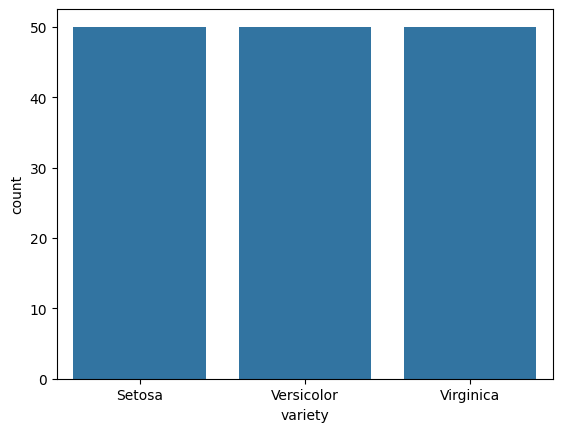

In [11]:
import seaborn as sns
counts = data["variety"].value_counts()
sns.barplot(data=counts)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data[data.duplicated(keep = False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


In [20]:
### Observations
# There are 150 rows and 5 columns
# - There are no Null values
# - There is one duplicated row
# - The x-columns are sepal.length, sepal.width, petal.length and petal.width
# - All the x-columns are continuous
# - The y-column is "variety" which is categorical
# - There are three flower categories(classes)
# - The x-columns are sepal.length, sepal.width, petal.length and petal.width
# - All the x-columns are continuous
# - The y-column is "variety" which is categorical
# - There are three flower categories(classes)

In [19]:
data = data.drop_duplicates(keep='first')

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:, -1])
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


In [37]:
data['variety'] = pd.to_numeric(labelencoder.fit_transform(data['variety']))
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.1 KB
None


<ipython-input-37-43910a32682c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['variety'] = pd.to_numeric(labelencoder.fit_transform(data['variety']))


In [43]:
X = data.iloc[:,0:4]
Y = data['variety']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
x_train

,sepal.length,sepal.width,petal.length,petal.width
45,4.8,3.0,1.4,0.3
56,6.3,3.3,4.7,1.6
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
116,6.5,3.0,5.5,1.8
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [46]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.9, 'x[3] <= 0.8\nentropy = 1.584\nsamples = 104\nvalue = [34, 34, 36]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 1.65\nentropy = 0.999\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[2] <= 5.0\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 

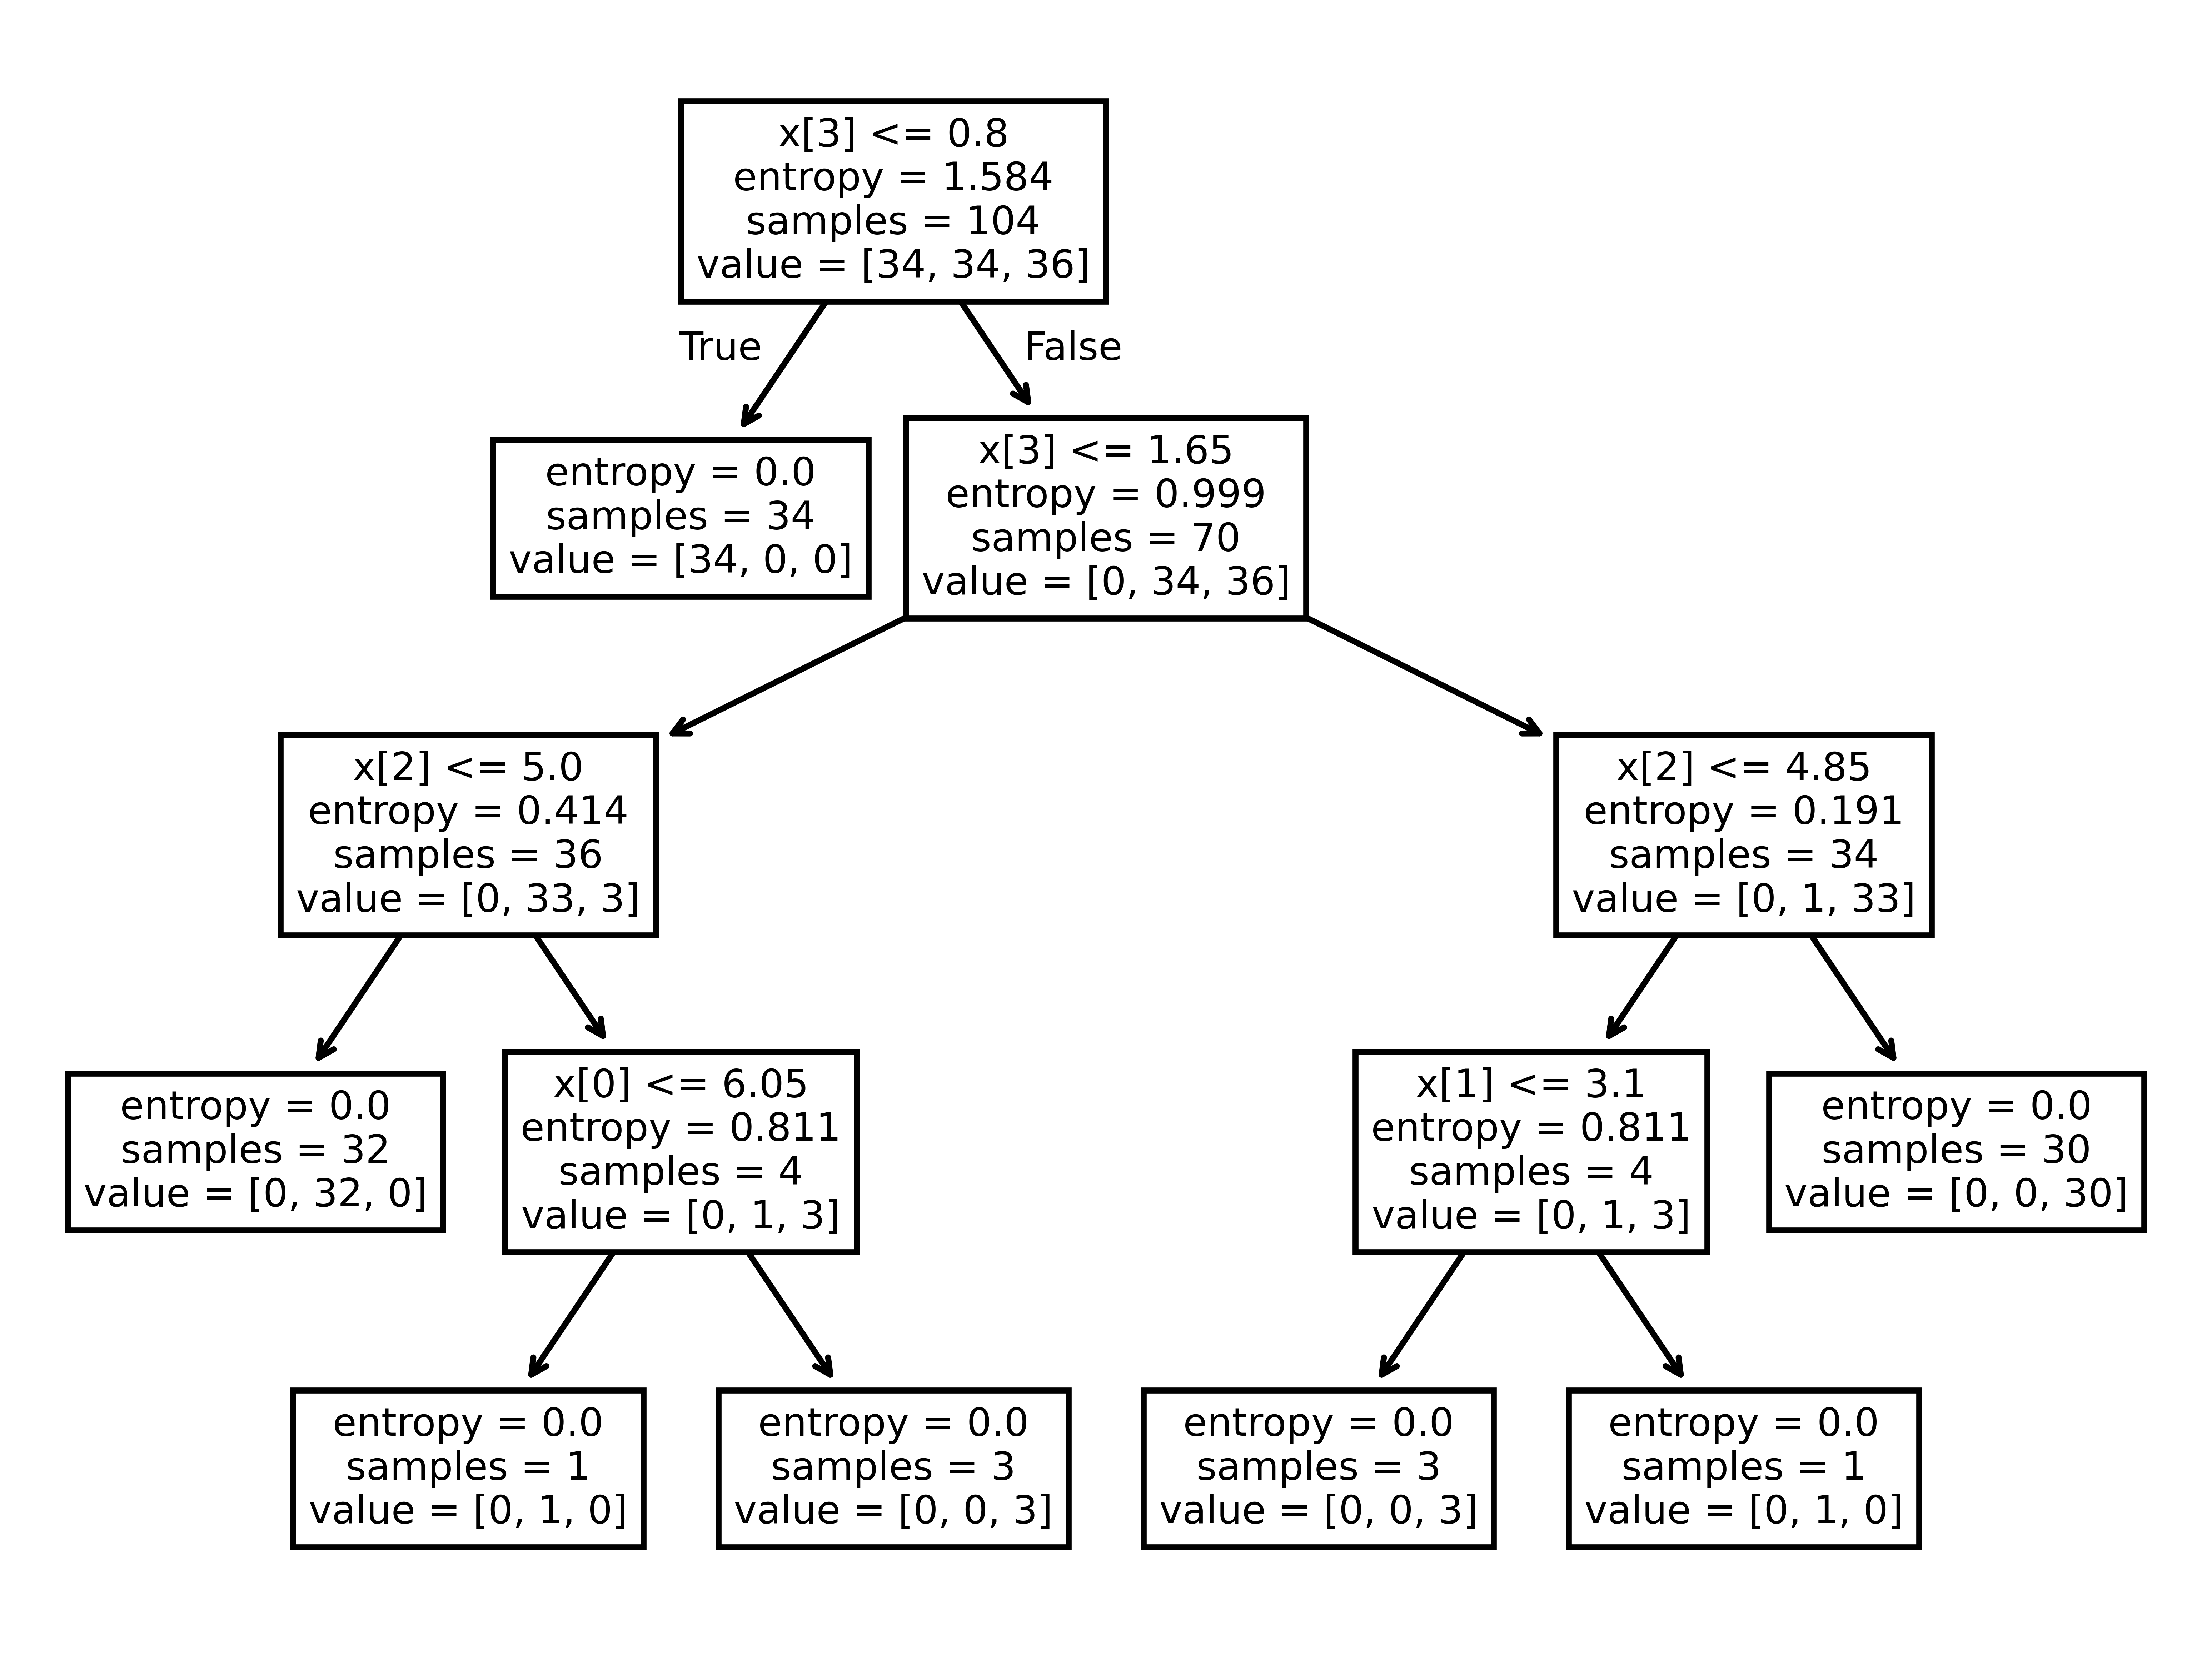

In [47]:
plt.figure(dpi=1200)
tree.plot_tree(model);

In [49]:
data['variety'] = pd.to_numeric(labelencoder.fit_transform(data['variety']))

<ipython-input-49-7aa8f73a8686>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['variety'] = pd.to_numeric(labelencoder.fit_transform(data['variety']))


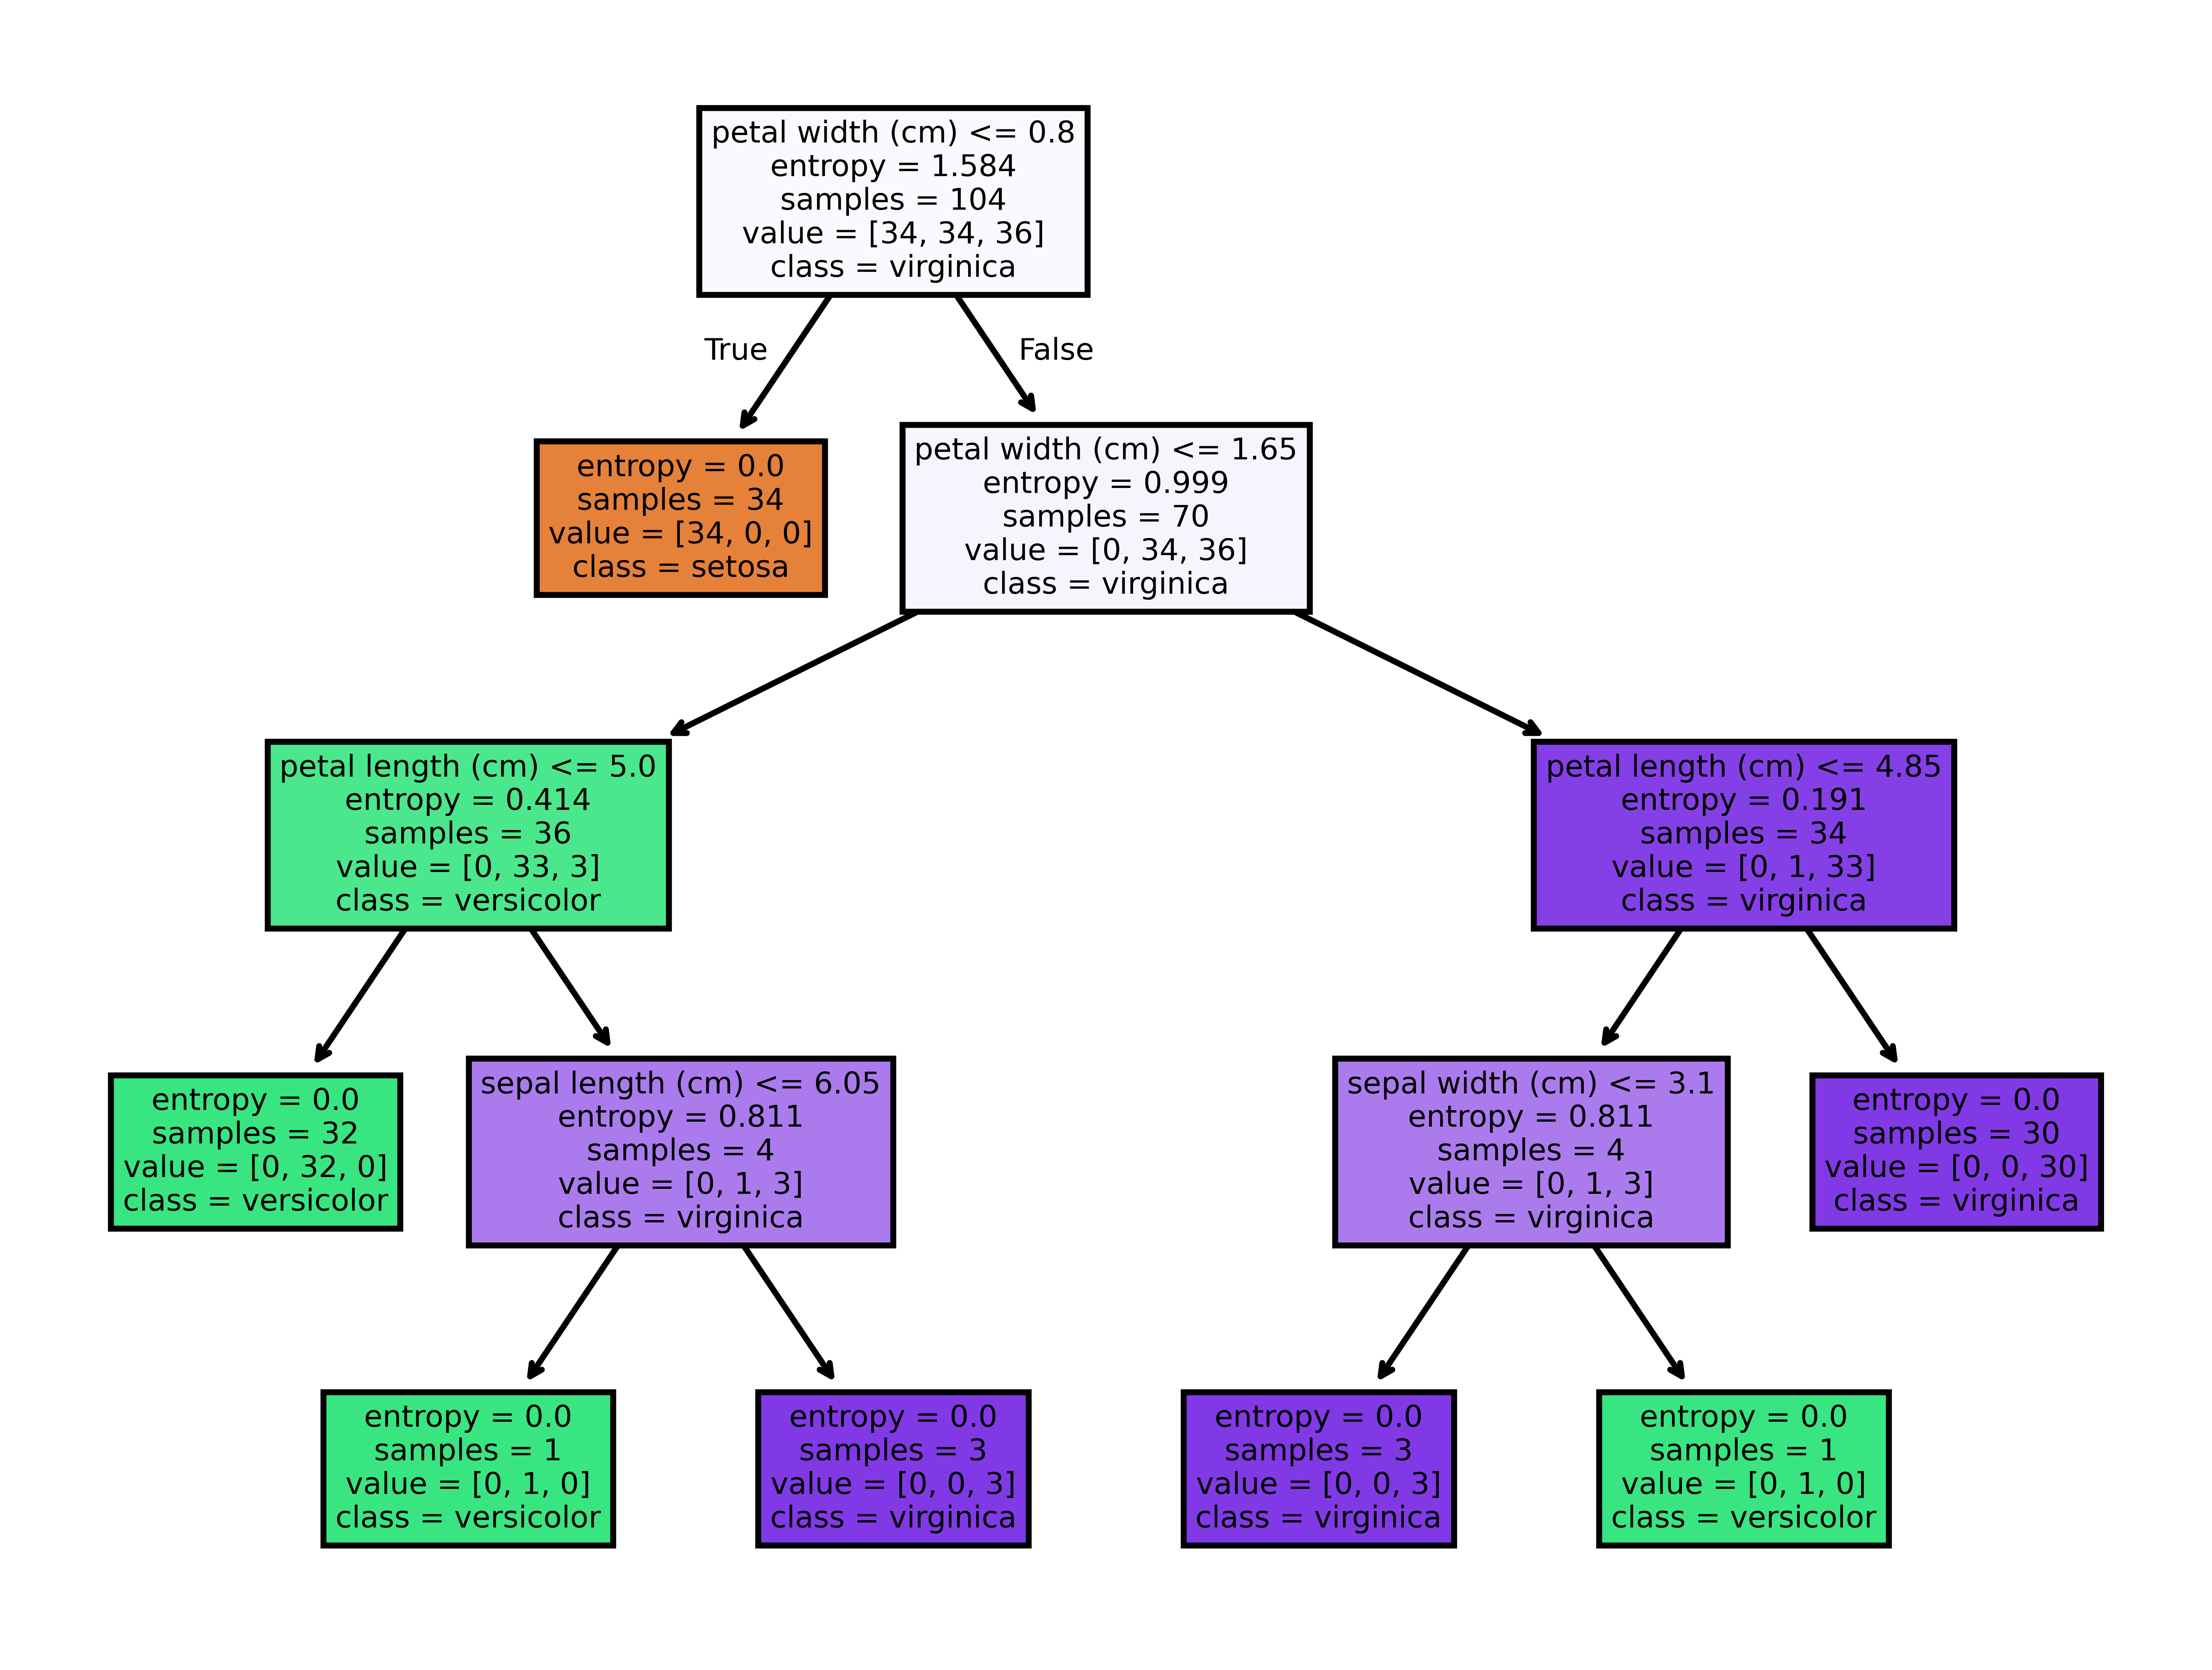

In [50]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);